# Final Analysis & Validation
## Crime Topic Movement & Fisher's Exact Tests

### References/Useful Links:
See compas_eval.ipynb for general documentation.   
SciPy Documentation for Fisher's Exact Tests: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import seaborn as sns
from datetime import datetime
import random
import scipy.stats as stats

In [99]:
topics_df = pd.read_csv('cr_topics_common.csv')
topics_df

,Unnamed: 0,id,charge type,name,race,charge description,tokenized description,max topic,PC1,PC2,t1,t2,t3,t4,t5
0,1,3,C,kevon dixon,African-American,Felony Battery w/Prior Convict,"['feloni', 'batteri', 'prior', 'convict']",3,0.028595,0.019220,0.022650,0.018484,0.925910,0.011355,0.021600
1,2,4,C,ed philo,African-American,Possession of Cocaine,"['possess', 'cocain']",2,0.186504,-0.215620,0.041795,0.879363,0.018040,0.020954,0.039848
2,6,8,C,edward riddle,Caucasian,Possession Burglary Tools,"['possess', 'burglari', 'tool']",2,0.206097,-0.239732,0.029379,0.915201,0.012681,0.014729,0.028010
3,9,13,C,bo bradac,Caucasian,Insurance Fraud,"['insur', 'fraud']",4,0.027481,-0.023308,0.041796,0.034109,0.018041,0.866206,0.039849
4,11,15,C,ellyaher lanza,African-American,Battery,['batteri'],5,-0.203979,-0.026388,0.072388,0.059075,0.031245,0.036291,0.801000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,7201,10985,R,kyle miller,African-American,Operating W/O Valid License,"['oper', 'valid', 'licens']",1,0.123438,0.285937,0.920605,0.023976,0.012681,0.014729,0.028010
6782,7205,10990,R,christopher tun,Caucasian,Assault,['assault'],5,-0.203979,-0.026388,0.072389,0.059075,0.031246,0.036291,0.801000
6783,7206,10992,R,alexander vega,Caucasian,Possess Cannabis/20 Grams Or Less,"['possess', 'cannabi', 'gram', 'less']",2,0.218748,-0.255128,0.022650,0.934623,0.009777,0.011355,0.021595
6784,7207,10994,R,jarred payne,African-American,Possession of Cannabis,"['possess', 'cannabi']",2,0.186504,-0.215620,0.041795,0.879363,0.018040,0.020954,0.039848


In [65]:
# filter first offense
f_topics_df = topics_df[topics_df['charge type'] == 'C']
# filter second offense
s_topics_df = topics_df[topics_df['charge type'] == 'R']

In [50]:
# filter black first offense
bf_topics_df = topics_df[(topics_df['race'] == 'African-American') & (topics_df['charge type'] == 'C')]
# filter black second offense
bs_topics_df = topics_df[(topics_df['race'] == 'African-American') & (topics_df['charge type'] == 'R')]
b_tot = len(bf_topics_df)

In [52]:
# filter white first offense
wf_topics_df = topics_df[(topics_df['race'] == 'Caucasian') & (topics_df['charge type'] == 'C')]
# filter white second offense
ws_topics_df = topics_df[(topics_df['race'] == 'Caucasian') & (topics_df['charge type'] == 'R')]
w_tot = len(wf_topics_df)

In [178]:
'''BLACK/WHITE, MOVE/DIDNT MOVE'''
b_same = 0
b_diff = 0
for i in range(len(bf_topics_df)):
    c_name = bf_topics_df.iloc[i]['name']
    c_idf = bf_topics_df.iloc[i]['id']
    r_name = bs_topics_df.iloc[i]['name']
    r_idf = bs_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = bf_topics_df.iloc[i]['max topic']
    s_topic = bs_topics_df.iloc[i]['max topic']
    
    if f_topic == s_topic: b_same += 1
    else: b_diff += 1
        
w_same = 0
w_diff = 0
for i in range(len(wf_topics_df)):
    c_name = wf_topics_df.iloc[i]['name']
    c_idf = wf_topics_df.iloc[i]['id']
    r_name = ws_topics_df.iloc[i]['name']
    r_idf = ws_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = wf_topics_df.iloc[i]['max topic']
    s_topic = ws_topics_df.iloc[i]['max topic']
    
    if f_topic == s_topic: w_same += 1
    else: w_diff += 1

In [179]:
print('Black defendants who did not move topics:', b_same)
print('Black defendants who moved topics:', b_diff)
print('White defendants who did not move topics:', w_same)
print('White defendants who moved topics:', w_diff)
print('\nPercent moved (Black):', b_diff/b_tot)
print('Percent moved (white):', w_diff/w_tot)

oddsratio, pvalue = stats.fisher_exact([[b_same, b_diff], [w_same, w_diff]])
print('\np-value from fisher exact test:', pvalue)

Black defendants who did not move topics: 603
Black defendants who moved topics: 1392
White defendants who did not move topics: 312
White defendants who moved topics: 689

Percent moved (Black): 0.6977443609022557
Percent moved (white): 0.6883116883116883

p-value from fisher exact test: 0.6138969850064663


In [44]:
viol_topics = [3, 5]

In [180]:
'''BLACK/WHITE, MOVE TO VIOL/DIDNT MOVE TO VIOL'''
b_more_viol = 0
for i in range(len(bf_topics_df)):
    c_name = bf_topics_df.iloc[i]['name']
    c_idf = bf_topics_df.iloc[i]['id']
    r_name = bs_topics_df.iloc[i]['name']
    r_idf = bs_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = bf_topics_df.iloc[i]['max topic']
    s_topic = bs_topics_df.iloc[i]['max topic']
    
    if f_topic not in viol_topics and s_topic in viol_topics: b_more_viol +=1
        
w_more_viol = 0
for i in range(len(wf_topics_df)):
    c_name = wf_topics_df.iloc[i]['name']
    c_idf = wf_topics_df.iloc[i]['id']
    r_name = ws_topics_df.iloc[i]['name']
    r_idf = ws_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = wf_topics_df.iloc[i]['max topic']
    s_topic = ws_topics_df.iloc[i]['max topic']
    
    if f_topic not in viol_topics and s_topic in viol_topics: w_more_viol +=1

b_other = b_tot - b_more_viol
w_other = w_tot - w_more_viol

In [181]:
print('Black defendants who re-offended with same or less-violent crime:', b_other)
print('Black defendants who re-offended with a more violent crime:', b_more_viol)
print('White defendants who re-offended with same or less-violent crime:', w_other)
print('White defendants who re-offended with a more violent crime:', w_more_viol)
print('\nPercent more violent re-offense (Black):', b_more_viol/b_tot)
print('Percent more violent re-offense (white):', w_more_viol/w_tot)

oddsratio, pvalue = stats.fisher_exact([[b_other, b_more_viol], [w_other, w_more_viol]])
print('\np-value from fisher exact test:', pvalue)

Black defendants who re-offended with same or less-violent crime: 1746
Black defendants who re-offended with a more violent crime: 249
White defendants who re-offended with same or less-violent crime: 883
White defendants who re-offended with a more violent crime: 118

Percent more violent re-offense (Black): 0.12481203007518797
Percent more violent re-offense (white): 0.11788211788211789

p-value from fisher exact test: 0.5956324083344429


In [204]:
'''BLACK/WHITE, DRUG-RELATED'''
# num who stayed or moved to drug (i.e. second offense was drug)
b_s_drug = 0
# num who stayed in drug (first and second both drug)
b_stay_drug = 0
# num who moved out of drug (first offense drug, second other)
b_move_out_drug = 0
# num whos first offense was drug
b_f_drug = 0
# num who moved to drug from other (first offense other, second drug)
b_to_drug_from_other = 0
# num who never offended w/ drug
b_to_other_from_other = 0

drug_topic = 2
for i in range(len(bf_topics_df)):
    c_name = bf_topics_df.iloc[i]['name']
    c_idf = bf_topics_df.iloc[i]['id']
    r_name = bs_topics_df.iloc[i]['name']
    r_idf = bs_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = bf_topics_df.iloc[i]['max topic']
    s_topic = bs_topics_df.iloc[i]['max topic']
    
    if f_topic == drug_topic:
        b_f_drug += 1
        if s_topic == drug_topic: 
            b_stay_drug +=1
            b_s_drug += 1
        else:
            b_move_out_drug +=1
    elif s_topic == drug_topic: 
        b_to_drug_from_other +=1
        b_s_drug += 1
    else:
        b_to_other_from_other += 1
        
# num who stayed or moved to drug (i.e. second offense was drug)
w_s_drug = 0
# num who stayed in drug (first and second both drug)
w_stay_drug = 0
# num who moved out of drug (first offense drug, second other)
w_move_out_drug = 0
# num whos first offense was drug
w_f_drug = 0
# num who moved to drug from other (first offense other, second drug)
w_to_drug_from_other = 0
# num who never offended w/ drug
w_to_other_from_other = 0

drug_topic = 2
for i in range(len(wf_topics_df)):
    c_name = wf_topics_df.iloc[i]['name']
    c_idf = wf_topics_df.iloc[i]['id']
    r_name = ws_topics_df.iloc[i]['name']
    r_idf = ws_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = wf_topics_df.iloc[i]['max topic']
    s_topic = ws_topics_df.iloc[i]['max topic']
    
    if f_topic == drug_topic:
        w_f_drug += 1
        if s_topic == drug_topic: 
            w_stay_drug +=1
            w_s_drug += 1
        else:
            w_move_out_drug +=1
    elif s_topic == drug_topic: 
        w_to_drug_from_other +=1
        w_s_drug += 1
    else:
        w_to_other_from_other += 1

In [207]:
print('Black defendants who first offended with a drug-related crime', b_f_drug)
print('Black defendants who reoffended with a drug-related crime:', b_s_drug)
print('Black defendants who offended with a drug-related crime both times:', b_stay_drug)
print('Black defendants who offended with another topic and reoffended with a drug-related crime:', b_to_drug_from_other)
print('Black defendants who first offended with a drug-related crime and moved to another topic:', b_move_out_drug)
print('Black defendants who never offended with a drug-related crime:', b_to_other_from_other)

Black defendants who first offended with a drug-related crime 448
Black defendants who reoffended with a drug-related crime: 501
Black defendants who offended with a drug-related crime both times: 167
Black defendants who offended with another topic and reoffended with a drug-related crime: 334
Black defendants who first offended with a drug-related crime and moved to another topic: 281
Black defendants who never offended with a drug-related crime: 1213


In [208]:
print('White defendants who first offended with a drug-related crime', w_f_drug)
print('White defendants who reoffended with a drug-related crime:', w_s_drug)
print('White defendants who offended with a drug-related crime both times:', w_stay_drug)
print('White defendants who offended with another topic and reoffended with a drug-related crime:', w_to_drug_from_other)
print('White defendants who first offended with a drug-related crime and moved to another topic:', w_move_out_drug)
print('White defendants who never offended with a drug-related crime:', w_to_other_from_other)

White defendants who first offended with a drug-related crime 219
White defendants who reoffended with a drug-related crime: 233
White defendants who offended with a drug-related crime both times: 87
White defendants who offended with another topic and reoffended with a drug-related crime: 146
White defendants who first offended with a drug-related crime and moved to another topic: 132
White defendants who never offended with a drug-related crime: 636


In [211]:
# moved to drug vs moved to other
print('Black: Of those who didn\'t first commit a drug-related offense, percent that moved to drug:', b_to_drug_from_other/(b_to_drug_from_other + b_to_other_from_other))
print('White: Of those who didn\'t first commit a drug-related offense, percent that moved to drug:', w_to_drug_from_other/(w_to_drug_from_other + w_to_other_from_other))
oddsratio, pvalue = stats.fisher_exact([[b_to_drug_from_other, b_to_other_from_other], [w_to_drug_from_other, w_to_other_from_other]])
print('\np-value from fisher exact test:', pvalue)

Black: Of those who didn't first commit a drug-related offense, percent that moved to drug: 0.21590174531351003
White: Of those who didn't first commit a drug-related offense, percent that moved to drug: 0.1867007672634271

p-value from fisher exact test: 0.10386966179655584


In [215]:
# stayed in drug vs moved to other
print('Black: Of those who did first commit a drug-related offense, percent that stayed in drug:', b_stay_drug/b_f_drug)
print('White: Of those who did first commit a drug-related offense, percent that stayed in drug:', w_stay_drug/w_f_drug)
print('Black: Of those who did first commit a drug-related offense, percent that moved out of drug:', b_move_out_drug/b_f_drug)
print('White: Of those who did first commit a drug-related offense, percent that moved out of drug:', w_move_out_drug/w_f_drug)
oddsratio, pvalue = stats.fisher_exact([[b_stay_drug, b_move_out_drug], [w_stay_drug, w_move_out_drug]])
print('\np-value from fisher exact test:', pvalue)

Black: Of those who did first commit a drug-related offense, percent that stayed in drug: 0.37276785714285715
White: Of those who did first commit a drug-related offense, percent that stayed in drug: 0.3972602739726027
Black: Of those who did first commit a drug-related offense, percent that moved out of drug: 0.6272321428571429
White: Of those who did first commit a drug-related offense, percent that moved out of drug: 0.6027397260273972

p-value from fisher exact test: 0.5531101392048297


In [220]:
'''BLACK/WHITE, DRIVING-RELATED'''
# num who stayed or moved to drive (i.e. second offense was drive)
b_s_drive = 0
# num who stayed in drive (first and second both drive)
b_stay_drive = 0
# num who moved out of drive (first offense drive, second other)
b_move_out_drive = 0
# num whos first offense was drive
b_f_drive = 0
# num who moved to drive from other (first offense other, second drive)
b_to_drive_from_other = 0
# num who never offended w/ drive
b_to_other_from_other = 0

drive_topic = 1
for i in range(len(bf_topics_df)):
    c_name = bf_topics_df.iloc[i]['name']
    c_idf = bf_topics_df.iloc[i]['id']
    r_name = bs_topics_df.iloc[i]['name']
    r_idf = bs_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = bf_topics_df.iloc[i]['max topic']
    s_topic = bs_topics_df.iloc[i]['max topic']
    
    if f_topic == drive_topic:
        b_f_drive += 1
        if s_topic == drive_topic: 
            b_stay_drive +=1
            b_s_drive += 1
        else:
            b_move_out_drive +=1
    elif s_topic == drive_topic: 
        b_to_drive_from_other +=1
        b_s_drive += 1
    else:
        b_to_other_from_other += 1
        
# num who stayed or moved to drive (i.e. second offense was drive)
w_s_drive = 0
# num who stayed in drive (first and second both drive)
w_stay_drive = 0
# num who moved out of drive (first offense drive, second other)
w_move_out_drive = 0
# num whos first offense was drive
w_f_drive = 0
# num who moved to drive from other (first offense other, second drive)
w_to_drive_from_other = 0
# num who never offended w/ drive
w_to_other_from_other = 0

for i in range(len(wf_topics_df)):
    c_name = wf_topics_df.iloc[i]['name']
    c_idf = wf_topics_df.iloc[i]['id']
    r_name = ws_topics_df.iloc[i]['name']
    r_idf = ws_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = wf_topics_df.iloc[i]['max topic']
    s_topic = ws_topics_df.iloc[i]['max topic']
    
    if f_topic == drive_topic:
        w_f_drive += 1
        if s_topic == drive_topic: 
            w_stay_drive +=1
            w_s_drive += 1
        else:
            w_move_out_drive +=1
    elif s_topic == drive_topic: 
        w_to_drive_from_other +=1
        w_s_drive += 1
    else:
        w_to_other_from_other += 1

In [222]:
print('Black defendants who first offended with a driving-related crime', b_f_drive)
print('Black defendants who reoffended with a driving-related crime:', b_s_drive)
print('Black defendants who offended with a driving-related crime both times:', b_stay_drive)
print('Black defendants who offended with another topic and reoffended with a driving-related crime:', b_to_drive_from_other)
print('Black defendants who first offended with a driving-related crime and moved to another topic:', b_move_out_drive)
print('Black defendants who never offended with a driving-related crime:', b_to_other_from_other)

Black defendants who first offended with a driving-related crime 318
Black defendants who reoffended with a driving-related crime: 725
Black defendants who offended with a driving-related crime both times: 171
Black defendants who offended with another topic and reoffended with a driving-related crime: 554
Black defendants who first offended with a driving-related crime and moved to another topic: 147
Black defendants who never offended with a driving-related crime: 1123


In [223]:
print('White defendants who first offended with a driving-related crime', w_f_drive)
print('White defendants who reoffended with a driving-related crime:', w_s_drive)
print('White defendants who offended with a driving-related crime both times:', w_stay_drive)
print('White defendants who offended with another topic and reoffended with a driving-related crime:', w_to_drive_from_other)
print('White defendants who first offended with a driving-related crime and moved to another topic:', w_move_out_drive)
print('White defendants who never offended with a driving-related crime:', w_to_other_from_other)

White defendants who first offended with a driving-related crime 113
White defendants who reoffended with a driving-related crime: 312
White defendants who offended with a driving-related crime both times: 58
White defendants who offended with another topic and reoffended with a driving-related crime: 254
White defendants who first offended with a driving-related crime and moved to another topic: 55
White defendants who never offended with a driving-related crime: 634


In [224]:
# moved to driving vs moved to other
print('Black: Of those who didn\'t first commit a driving-related offense, percent that moved to driving:', b_to_drive_from_other/(b_to_drive_from_other + b_to_other_from_other))
print('White: Of those who didn\'t first commit a driving-related offense, percent that moved to driving:', w_to_drive_from_other/(w_to_drive_from_other + w_to_other_from_other))
oddsratio, pvalue = stats.fisher_exact([[b_to_drive_from_other, b_to_other_from_other], [w_to_drive_from_other, w_to_other_from_other]])
print('\np-value from fisher exact test:', pvalue)

Black: Of those who didn't first commit a driving-related offense, percent that moved to driving: 0.3303518187239117
White: Of those who didn't first commit a driving-related offense, percent that moved to driving: 0.28603603603603606

p-value from fisher exact test: 0.02269851529031415


In [225]:
# stayed in driving vs moved to other
print('Black: Of those who did first commit a driving-related offense, percent that stayed in driving:', b_stay_drive/b_f_drive)
print('White: Of those who did first commit a driving-related offense, percent that stayed in driving:', w_stay_drive/w_f_drive)
print('Black: Of those who did first commit a driving-related offense, percent that moved out of driving:', b_move_out_drive/b_f_drive)
print('White: Of those who did first commit a driving-related offense, percent that moved out of driving:', w_move_out_drive/w_f_drive)
oddsratio, pvalue = stats.fisher_exact([[b_stay_drive, b_move_out_drive], [w_stay_drive, w_move_out_drive]])
print('\np-value from fisher exact test:', pvalue)

Black: Of those who did first commit a driving-related offense, percent that stayed in driving: 0.5377358490566038
White: Of those who did first commit a driving-related offense, percent that stayed in driving: 0.5132743362831859
Black: Of those who did first commit a driving-related offense, percent that moved out of driving: 0.46226415094339623
White: Of those who did first commit a driving-related offense, percent that moved out of driving: 0.48672566371681414

p-value from fisher exact test: 0.6623385006902218


In [79]:
'''Test Effect of Topic 1'''
curr_topic = 1
moved_out_1 = 0
stayed_in_1 = 0
moved_out_other_1 = 0
stayed_in_other_1 = 0
for i in range(len(f_topics_df)):
    c_name = f_topics_df.iloc[i]['name']
    c_idf = f_topics_df.iloc[i]['id']
    r_name = s_topics_df.iloc[i]['name']
    r_idf = s_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = f_topics_df.iloc[i]['max topic']
    s_topic = s_topics_df.iloc[i]['max topic']
    
    if f_topic == curr_topic:
        if s_topic == curr_topic:
            stayed_in_1 += 1
        else:
            moved_out_1 += 1
    else:
        if s_topic == f_topic:
            stayed_in_other_1 += 1
        else:
            moved_out_other_1 += 1

In [91]:
print('First offense in topic 1 and stayed:', stayed_in_1)
print('First offense in topic 1 and moved:', moved_out_1)
print('First offense not in topic 1 and stayed:', stayed_in_other_1)
print('First offense not in topic 1 and moved:', moved_out_other_1)

print('\nPercent moved out of topic 1:', moved_out_1/(moved_out_1 + stayed_in_1))
print('Percent moved out of other topics:', moved_out_other_1/(moved_out_other_1 + stayed_in_other_1))

oddsratio, pvalue = stats.fisher_exact([[stayed_in_1, moved_out_1], [stayed_in_other_1, moved_out_other_1]])
print('\np-value from fisher exact test:', pvalue)

First offense in topic 1 and stayed: 258
First offense in topic 1 and moved: 223
First offense not in topic 1 and stayed: 768
First offense not in topic 1 and moved: 2144

Percent moved out of topic 1: 0.46361746361746364
Percent moved out of other topics: 0.7362637362637363

p-value from fisher exact test: 6.172283655066881e-31


In [81]:
'''Test Effect of Topic 2'''
curr_topic = 2
moved_out_2 = 0
stayed_in_2 = 0
moved_out_other_2 = 0
stayed_in_other_2 = 0
for i in range(len(f_topics_df)):
    c_name = f_topics_df.iloc[i]['name']
    c_idf = f_topics_df.iloc[i]['id']
    r_name = s_topics_df.iloc[i]['name']
    r_idf = s_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = f_topics_df.iloc[i]['max topic']
    s_topic = s_topics_df.iloc[i]['max topic']
    
    if f_topic == curr_topic:
        if s_topic == curr_topic:
            stayed_in_2 += 1
        else:
            moved_out_2 += 1
    else:
        if s_topic == f_topic:
            stayed_in_other_2 += 1
        else:
            moved_out_other_2 += 1

In [92]:
print('First offense in topic 2 and stayed:', stayed_in_2)
print('First offense in topic 2 and moved:', moved_out_2)
print('First offense not in topic 2 and stayed:', stayed_in_other_2)
print('First offense not in topic 2 and moved:', moved_out_other_2)

print('\nPercent moved out of topic 2:', moved_out_2/(moved_out_2 + stayed_in_2))
print('Percent moved out of other topics:', moved_out_other_2/(moved_out_other_2 + stayed_in_other_2))

oddsratio, pvalue = stats.fisher_exact([[stayed_in_2, moved_out_2], [stayed_in_other_2, moved_out_other_2]])
print('\np-value from fisher exact test:', pvalue)

First offense in topic 2 and stayed: 281
First offense in topic 2 and moved: 460
First offense not in topic 2 and stayed: 745
First offense not in topic 2 and moved: 1907

Percent moved out of topic 2: 0.6207827260458839
Percent moved out of other topics: 0.719079939668175

p-value from fisher exact test: 3.879502258274497e-07


In [83]:
'''Test Effect of Topic 3'''
curr_topic = 3
moved_out_3 = 0
stayed_in_3 = 0
moved_out_other_3 = 0
stayed_in_other_3 = 0
for i in range(len(f_topics_df)):
    c_name = f_topics_df.iloc[i]['name']
    c_idf = f_topics_df.iloc[i]['id']
    r_name = s_topics_df.iloc[i]['name']
    r_idf = s_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = f_topics_df.iloc[i]['max topic']
    s_topic = s_topics_df.iloc[i]['max topic']
    
    if f_topic == curr_topic:
        if s_topic == curr_topic:
            stayed_in_3 += 1
        else:
            moved_out_3 += 1
    else:
        if s_topic == f_topic:
            stayed_in_other_3 += 1
        else:
            moved_out_other_3 += 1

In [94]:
print('First offense in topic 3 and stayed:', stayed_in_3)
print('First offense in topic 3 and moved:', moved_out_3)
print('First offense not in topic 3 and stayed:', stayed_in_other_3)
print('First offense not in topic 3 and moved:', moved_out_other_3)

print('\nPercent moved out of topic 3:', moved_out_3/(moved_out_3 + stayed_in_3))
print('Percent moved out of other topics:', moved_out_other_3/(moved_out_other_3 + stayed_in_other_3))

oddsratio, pvalue = stats.fisher_exact([[stayed_in_3, moved_out_3], [stayed_in_other_3, moved_out_other_3]])
print('\np-value from fisher exact test:', pvalue)

First offense in topic 3 and stayed: 52
First offense in topic 3 and moved: 222
First offense not in topic 3 and stayed: 974
First offense not in topic 3 and moved: 2145

Percent moved out of topic 3: 0.8102189781021898
Percent moved out of other topics: 0.6877204232125681

p-value from fisher exact test: 1.4024527758795116e-05


In [87]:
'''Test Effect of Topic 4'''
curr_topic = 4
moved_out_4 = 0
stayed_in_4 = 0
moved_out_other_4 = 0
stayed_in_other_4 = 0
for i in range(len(f_topics_df)):
    c_name = f_topics_df.iloc[i]['name']
    c_idf = f_topics_df.iloc[i]['id']
    r_name = s_topics_df.iloc[i]['name']
    r_idf = s_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = f_topics_df.iloc[i]['max topic']
    s_topic = s_topics_df.iloc[i]['max topic']
    
    if f_topic == curr_topic:
        if s_topic == curr_topic:
            stayed_in_4 += 1
        else:
            moved_out_4 += 1
    else:
        if s_topic == f_topic:
            stayed_in_other_4 += 1
        else:
            moved_out_other_4 += 1

In [95]:
print('First offense in topic 4 and stayed:', stayed_in_4)
print('First offense in topic 4 and moved:', moved_out_4)
print('First offense not in topic 4 and stayed:', stayed_in_other_4)
print('First offense not in topic 4 and moved:', moved_out_other_4)

print('\nPercent moved out of topic 4:', moved_out_4/(moved_out_4 + stayed_in_4))
print('Percent moved out of other topics:', moved_out_other_4/(moved_out_other_4 + stayed_in_other_4))

oddsratio, pvalue = stats.fisher_exact([[stayed_in_4, moved_out_4], [stayed_in_other_4, moved_out_other_4]])
print('\np-value from fisher exact test:', pvalue)

First offense in topic 4 and stayed: 90
First offense in topic 4 and moved: 397
First offense not in topic 4 and stayed: 936
First offense not in topic 4 and moved: 1970

Percent moved out of topic 4: 0.8151950718685832
Percent moved out of other topics: 0.6779077770130764

p-value from fisher exact test: 2.5884645740589733e-10


In [89]:
'''Test Effect of Topic 5'''
curr_topic = 5
moved_out_5 = 0
stayed_in_5 = 0
moved_out_other_5 = 0
stayed_in_other_5 = 0
for i in range(len(f_topics_df)):
    c_name = f_topics_df.iloc[i]['name']
    c_idf = f_topics_df.iloc[i]['id']
    r_name = s_topics_df.iloc[i]['name']
    r_idf = s_topics_df.iloc[i]['id']  
    assert(c_name == r_name and c_idf == r_idf)
    
    f_topic = f_topics_df.iloc[i]['max topic']
    s_topic = s_topics_df.iloc[i]['max topic']
    
    if f_topic == curr_topic:
        if s_topic == curr_topic:
            stayed_in_5 += 1
        else:
            moved_out_5 += 1
    else:
        if s_topic == f_topic:
            stayed_in_other_5 += 1
        else:
            moved_out_other_5 += 1

In [96]:
print('First offense in topic 5 and stayed:', stayed_in_5)
print('First offense in topic 5 and moved:', moved_out_5)
print('First offense not in topic 5 and stayed:', stayed_in_other_5)
print('First offense not in topic 5 and moved:', moved_out_other_5)

print('\nPercent moved out of topic 5:', moved_out_5/(moved_out_5 + stayed_in_5))
print('Percent moved out of other topics:', moved_out_other_5/(moved_out_other_5 + stayed_in_other_5))

oddsratio, pvalue = stats.fisher_exact([[stayed_in_5, moved_out_5], [stayed_in_other_5, moved_out_other_5]])
print('\np-value from fisher exact test:', pvalue)

First offense in topic 5 and stayed: 345
First offense in topic 5 and moved: 1065
First offense not in topic 5 and stayed: 681
First offense not in topic 5 and moved: 1302

Percent moved out of topic 5: 0.7553191489361702
Percent moved out of other topics: 0.6565809379727685

p-value from fisher exact test: 5.973589332204316e-10


## Extra: Topics by Risk Score

In [100]:
# compas_path = 'compas-scores-two-years.csv'
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
compas_df = pd.read_csv(url)

In [115]:
compas_df_filt = compas_df[(compas_df['c_charge_desc'].isna() == False) & (compas_df['r_charge_desc'].isna() == False)]

In [108]:
b_avg_decile = np.mean(np.array(compas_df_filt[compas_df_filt['race'] == 'African-American'].decile_score))
w_avg_decile = np.mean(np.array(compas_df_filt[compas_df_filt['race'] == 'Caucasian'].decile_score))
print('Average decile score for Black defendants who recidivated & have second offense recorded:', b_avg_decile)
print('Average decile score for white defendants who recidivated & have second offense recorded:', w_avg_decile)

Average decile score for Black defendants who recidivated & have second offense recorded: 6.21453634085213
Average decile score for white defendants who recidivated & have second offense recorded: 4.77022977022977


In [116]:
# separate df into b_first, b_second, w_first, and w_second PCs

first_off_topics_df = topics_df[topics_df['charge type'] == 'C']
first_off_topics_df.insert(7, 'decile_score', compas_df_filt.decile_score.tolist())
first_off_topics_df

,Unnamed: 0,id,charge type,name,race,charge description,tokenized description,decile_score,max topic,PC1,PC2,t1,t2,t3,t4,t5
0,1,3,C,kevon dixon,African-American,Felony Battery w/Prior Convict,"['feloni', 'batteri', 'prior', 'convict']",3,3,0.028595,0.019220,0.022650,0.018484,0.925910,0.011355,0.021600
1,2,4,C,ed philo,African-American,Possession of Cocaine,"['possess', 'cocain']",4,2,0.186504,-0.215620,0.041795,0.879363,0.018040,0.020954,0.039848
2,6,8,C,edward riddle,Caucasian,Possession Burglary Tools,"['possess', 'burglari', 'tool']",6,2,0.206097,-0.239732,0.029379,0.915201,0.012681,0.014729,0.028010
3,9,13,C,bo bradac,Caucasian,Insurance Fraud,"['insur', 'fraud']",3,4,0.027481,-0.023308,0.041796,0.034109,0.018041,0.866206,0.039849
4,11,15,C,ellyaher lanza,African-American,Battery,['batteri'],6,5,-0.203979,-0.026388,0.072388,0.059075,0.031245,0.036291,0.801000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,7201,10985,C,kyle miller,African-American,Possession of Cocaine,"['possess', 'cocain']",10,2,0.186504,-0.215620,0.041795,0.879363,0.018040,0.020954,0.039848
3389,7205,10990,C,christopher tun,Caucasian,arrest case no charge,"['arrest', 'case', 'charg']",10,5,-0.292064,-0.042908,0.029379,0.023976,0.012681,0.014729,0.919236
3390,7206,10992,C,alexander vega,Caucasian,Grand Theft (Motor Vehicle),"['grand', 'theft', 'motor', 'vehicl']",6,5,-0.256462,-0.061512,0.022650,0.018484,0.009777,0.343562,0.605527
3391,7207,10994,C,jarred payne,African-American,Possess Cannabis/20 Grams Or Less,"['possess', 'cannabi', 'gram', 'less']",2,2,0.218748,-0.255128,0.022650,0.934623,0.009777,0.011355,0.021595


In [118]:
# get indices for black in 1st charge
b_first_pcs = first_off_topics_df[first_off_topics_df['race'] == 'African-American'][['tokenized description', 'decile_score', 'max topic', 'PC1', 'PC2']]
# get indices for white in 1st charge
w_first_pcs = first_off_topics_df[first_off_topics_df['race'] == 'Caucasian'][['tokenized description', 'decile_score', 'max topic', 'PC1', 'PC2']]

In [120]:
second_off_topics_df = topics_df[topics_df['charge type'] == 'R']
second_off_topics_df.insert(7, 'f_decile_score', compas_df_filt.decile_score.tolist())
second_off_topics_df

,Unnamed: 0,id,charge type,name,race,charge description,tokenized description,f_decile_score,max topic,PC1,PC2,t1,t2,t3,t4,t5
3393,1,3,R,kevon dixon,African-American,Felony Battery (Dom Strang),"['feloni', 'batteri', 'domest', 'strangul']",3,3,0.028597,0.019219,0.022650,0.018484,0.925911,0.011355,0.021599
3394,2,4,R,ed philo,African-American,Driving Under The Influence,"['drive', 'influenc']",4,1,-0.123303,0.175787,0.464440,0.034109,0.018040,0.020954,0.462457
3395,6,8,R,edward riddle,Caucasian,Poss of Firearm by Convic Felo,"['possess', 'firearm', 'convict', 'felon']",6,2,0.218747,-0.255120,0.022654,0.934618,0.009777,0.011356,0.021595
3396,9,13,R,bo bradac,Caucasian,Battery,['batteri'],3,5,-0.203979,-0.026388,0.072388,0.059075,0.031245,0.036291,0.801000
3397,11,15,R,ellyaher lanza,African-American,Driving License Suspended,"['drive', 'licens', 'suspend']",6,1,0.123438,0.285937,0.920605,0.023976,0.012681,0.014729,0.028010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,7201,10985,R,kyle miller,African-American,Operating W/O Valid License,"['oper', 'valid', 'licens']",10,1,0.123438,0.285937,0.920605,0.023976,0.012681,0.014729,0.028010
6782,7205,10990,R,christopher tun,Caucasian,Assault,['assault'],10,5,-0.203979,-0.026388,0.072389,0.059075,0.031246,0.036291,0.801000
6783,7206,10992,R,alexander vega,Caucasian,Possess Cannabis/20 Grams Or Less,"['possess', 'cannabi', 'gram', 'less']",6,2,0.218748,-0.255128,0.022650,0.934623,0.009777,0.011355,0.021595
6784,7207,10994,R,jarred payne,African-American,Possession of Cannabis,"['possess', 'cannabi']",2,2,0.186504,-0.215620,0.041795,0.879363,0.018040,0.020954,0.039848


In [121]:
# get indices for black in 2nd charge
b_second_pcs = second_off_topics_df[second_off_topics_df['race'] == 'African-American'][['tokenized description', 'f_decile_score', 'max topic', 'PC1', 'PC2']]
# get indices for white in 2nd charge
w_second_pcs = second_off_topics_df[second_off_topics_df['race'] == 'Caucasian'][['tokenized description', 'f_decile_score', 'max topic', 'PC1', 'PC2']]

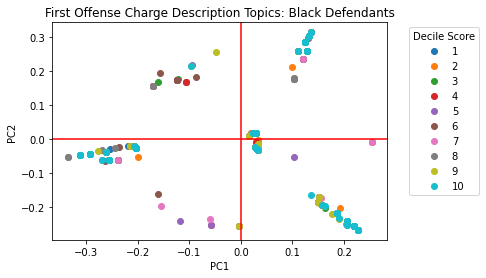

In [135]:
groups = b_first_pcs.groupby("decile_score")
for name, group in groups:
    plt.plot(group['PC1'], group['PC2'], marker="o", linestyle="", label=name)
plt.legend(title='Decile Score', bbox_to_anchor=(1.05, 1))
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Offense Charge Description Topics: Black Defendants');

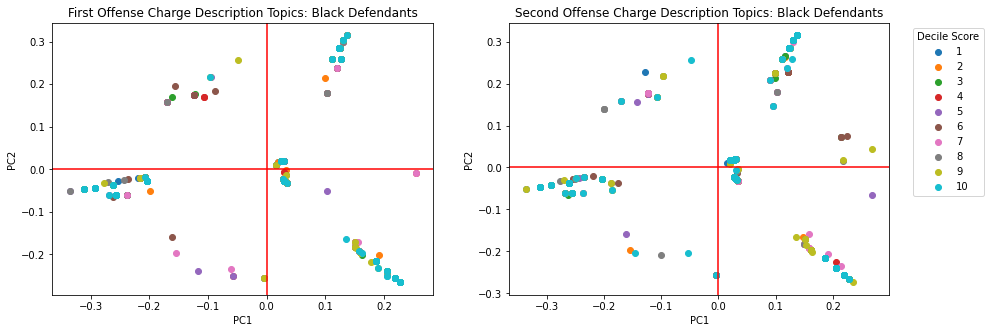

In [226]:
# Color Scatter Plots: 
# --> https://www.kite.com/python/answers/how-to-color-a-scatter-plot-by-category-using-matplotlib-in-python
# --> https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
groups = b_first_pcs.groupby("decile_score")
for name, group in groups:
    ax[0].plot(group['PC1'], group['PC2'], marker="o", linestyle="", label=name)
ax[0].axhline(y=0, color='red')
ax[0].axvline(x=0, color='red')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('First Offense Charge Description Topics: Black Defendants');

groups = b_second_pcs.groupby("f_decile_score")
for name, group in groups:
    ax[1].plot(group['PC1'], group['PC2'], marker="o", linestyle="", label=name)
ax[1].legend(title='Decile Score', bbox_to_anchor=(1.05, 1))
ax[1].axhline(y=0, color='red')
ax[1].axvline(x=0, color='red')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Second Offense Charge Description Topics: Black Defendants');

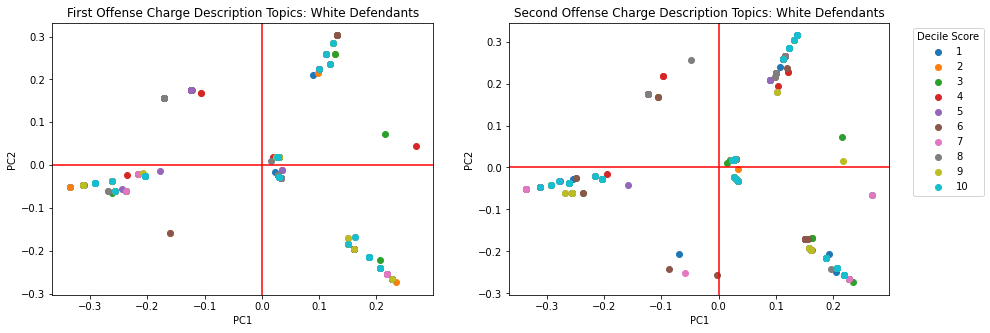

In [227]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
groups = w_first_pcs.groupby("decile_score")
for name, group in groups:
    ax[0].plot(group['PC1'], group['PC2'], marker="o", linestyle="", label=name)
ax[0].axhline(y=0, color='red')
ax[0].axvline(x=0, color='red')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('First Offense Charge Description Topics: White Defendants');

groups = w_second_pcs.groupby("f_decile_score")
for name, group in groups:
    ax[1].plot(group['PC1'], group['PC2'], marker="o", linestyle="", label=name)
ax[1].legend(title='Decile Score', bbox_to_anchor=(1.05, 1))
ax[1].axhline(y=0, color='red')
ax[1].axvline(x=0, color='red')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Second Offense Charge Description Topics: White Defendants');